In [1]:
import numpy as np
import pandas as pd
import time
import math
import itertools
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def create_dir(path, log=False):
    if not os.path.exists(path):
        if log:
            print('The directory', path, 'does not exist and will be created')
        os.makedirs(path)
    else:
        if log:
            print('The directory', path, ' already exists')

In [3]:
folder = os.path.join('QA_results', str(123), 'output')

### QA vs min-cut runtime up to 27 agents

In [4]:
report_filename = "IDP_report_011_123.txt"

IDP_brute_force = bool(int(report_filename.split('_')[-2][0]))
IDP_topdown_min_cut = bool(int(report_filename.split('_')[-2][1]))
IDP_min_cut_dwave_annealer = bool(int(report_filename.split('_')[-2][2]))

report_file_obj = open(os.path.join(report_filename),'r')
table_contents = [line.replace('\n','').split('__') for line in report_file_obj.readlines()]

In [5]:
#view output table
def highlight_false(s, column):
    is_false = pd.Series(data=False, index=s.index)
    is_false[column] = round(s.loc[column],2)<1.0
    return ['color: #ff8888' if is_false.any() else '' for v in is_false]

base_cols = ['Distribution', 'No. of Agents']
sub_cols = ['', '']

if IDP_brute_force:
    base_cols = base_cols+['Brute Force']*3
    sub_cols=sub_cols+['Result', 'Value', 'TTE']
if IDP_topdown_min_cut:
    base_cols = base_cols+['Top-down approach using min-cut']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']
if IDP_min_cut_dwave_annealer:
    base_cols = base_cols+['Dwave Annealer']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']


column_arrays = [base_cols, sub_cols]


#df = pd.DataFrame(table_contents, columns=table_headers)
df = pd.DataFrame(table_contents, columns=pd.MultiIndex.from_arrays(column_arrays))

In [6]:
pd.set_option('display.max_rows', None)

df.head()

Distribution No. of Agents Top-down approach using min-cut  \
                                                      Result   
0      laplace             2                         ['1,2']   
1      laplace             3                    ['3', '1,2']   
2      laplace             4               ['2,4', '3', '1']   
3      laplace             5                ['1,2,5', '3,4']   
4      laplace             6              ['1,3,6', '2,4,5']   

                                                          Dwave Annealer  \
                Value                    TTE Quality              Result   
0                 2.5                    0.0       1             ['1,2']   
1                 2.5                    0.0       1        ['1,2', '3']   
2                2.89                    0.0       1   ['1', '3', '2,4']   
3  21.639999999999997                    0.0       1    ['1,2,5', '3,4']   
4  21.099999999999998  0.0010342597961425781       1  ['2,4,5', '1,3,6']   

                                                  
                Value                TTE Quality  
0                 2.5                0.0     1.0  
1                 2.5  5.190215110778809     1.0  
2                2.89  10.37340497970581     1.0  
3  21.639999999999997  9.827338695526123     1.0  
4  21.099999999999998  14.80012822151184     1.0

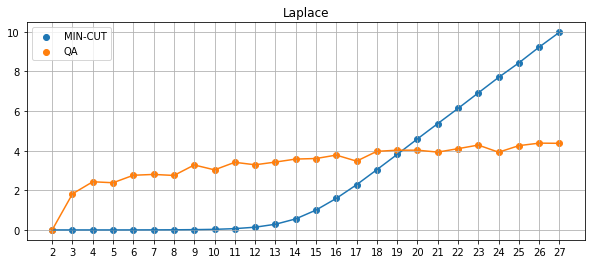

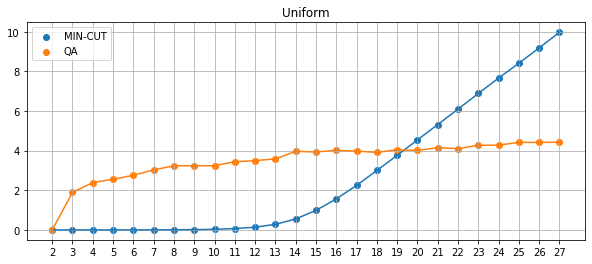

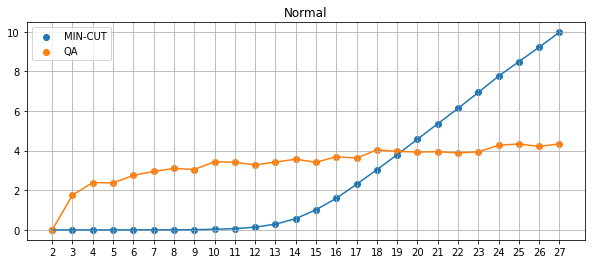

In [7]:
current_folder = file = os.path.join(folder, 'QA vs MIN-CUT')
create_dir(current_folder)

for distr in df.Distribution.unique():
    data = df[df.Distribution == distr]
    
    
#     plt.figure(figsize=(10,6))
#     x = data['No. of Agents'].to_numpy()
#     y_BF = data[('Top-down approach using min-cut', 'TTE')].astype(float).to_numpy()
#     y_QA = data[('Dwave Annealer', 'TTE')].astype(float).to_numpy()
    
#     plt.scatter(x, y_BF, label='Brute Force')
#     plt.plot(x, y_BF)
    
#     plt.scatter(x, y_QA, label='QA')
#     plt.plot(x, y_QA)
    
#     plt.grid()
#     plt.title(distr)
#     plt.legend()
#     # plt.savefig(distr+'.png')
#     plt.show()
    
    plt.figure(figsize=(10,4))
    x = data['No. of Agents'].to_numpy()
    y_BF = data[('Top-down approach using min-cut', 'TTE')].astype(float).to_numpy()
    y_QA = data[('Dwave Annealer', 'TTE')].astype(float).to_numpy()

    log_BF = np.log(y_BF+1)
    log_QA = np.log(y_QA+1)
    
    plt.scatter(x, log_BF, label='MIN-CUT')
    plt.plot(x, log_BF)

    plt.scatter(x, log_QA, label='QA')
    plt.plot(x, log_QA)
    
    plt.grid()
    plt.title(distr.capitalize())
    plt.legend()
    file = os.path.join(current_folder, distr+'_log.png')
    plt.savefig(file, dpi=300, bbox_inches = "tight")
    plt.show()

### Quality

In [8]:
report_filename = "IDP_report_111_123.txt"

IDP_brute_force = bool(int(report_filename.split('_')[-2][0]))
IDP_topdown_min_cut = bool(int(report_filename.split('_')[-2][1]))
IDP_min_cut_dwave_annealer = bool(int(report_filename.split('_')[-2][2]))

report_file_obj = open(os.path.join(report_filename),'r')
table_contents = [line.replace('\n','').split('__') for line in report_file_obj.readlines()]

In [9]:
current_folder = file = os.path.join(folder, 'Quality')
create_dir(current_folder)

In [10]:
#view output table
def highlight_false(s, column):
    is_false = pd.Series(data=False, index=s.index)
    is_false[column] = round(s.loc[column],2)<1.0
    return ['color: #ff8888' if is_false.any() else '' for v in is_false]

base_cols = ['Distribution', 'No. of Agents']
sub_cols = ['', '']

if IDP_brute_force:
    base_cols = base_cols+['Brute Force']*3
    sub_cols=sub_cols+['Result', 'Value', 'TTE']
if IDP_topdown_min_cut:
    base_cols = base_cols+['Top-down approach using min-cut']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']
if IDP_min_cut_dwave_annealer:
    base_cols = base_cols+['Dwave Annealer']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']


column_arrays = [base_cols, sub_cols]


#df = pd.DataFrame(table_contents, columns=table_headers)
df = pd.DataFrame(table_contents, columns=pd.MultiIndex.from_arrays(column_arrays))
df.head()

Distribution No. of Agents         Brute Force                      \
                                          Result               Value   
0      laplace             2             ['1,2']                 2.5   
1      laplace             3        ['3', '1,2']                 2.5   
2      laplace             4   ['2,4', '3', '1']                2.89   
3      laplace             5    ['1,2,5', '3,4']  21.639999999999997   
4      laplace             6  ['1,3,6', '2,4,5']  21.099999999999998   

                         Top-down approach using min-cut                      \
                     TTE                          Result               Value   
0  0.0009906291961669922                         ['1,2']                 2.5   
1                    0.0                    ['3', '1,2']                 2.5   
2                    0.0               ['2,4', '3', '1']                2.89   
3  0.0009961128234863281                ['1,2,5', '3,4']  21.639999999999997   
4   0.001994609832763672              ['1,3,6', '2,4,5']  21.099999999999998   

                                      Dwave Annealer                      \
                     TTE Quality              Result               Value   
0                    0.0     1.0             ['1,2']                 2.5   
1  0.0010154247283935547     1.0        ['3', '1,2']                 2.5   
2  0.0009951591491699219     1.0   ['1', '3', '2,4']                2.89   
3                    0.0     1.0    ['1,2,5', '3,4']  21.639999999999997   
4  0.0009975433349609375     1.0  ['1,3,6', '2,4,5']  21.099999999999998   

                               
                  TTE Quality  
0                 0.0     1.0  
1   5.409874200820923     1.0  
2   9.935318231582642     1.0  
3   10.16195011138916     1.0  
4  14.997750997543335     1.0

In [11]:
data = pd.concat([df["Distribution"] , df["No. of Agents"], df[('Top-down approach using min-cut', 'Quality')]], axis = 1)
data.columns = ["Distribution", "n", "Quality"]
data.Quality = data.Quality.astype(float)

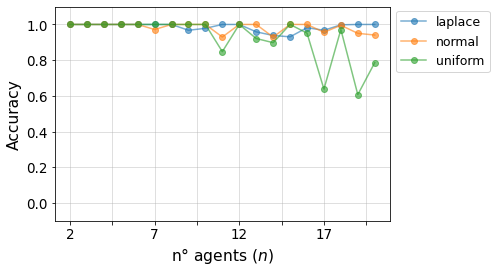

In [12]:
font=13.5

fig, ax = plt.subplots(figsize=(7,3.9))

for i, g in data.groupby('Distribution'):
    g.plot(x='n', y='Quality', ax=ax, label=str(i), style='o-', alpha=.6)#, marker='8', markersize=8, alpha=.6)#, yerr='std_acc')
#     plt.fill_between(x=g['n_agents'], y1 = g['time'] - g['std'], y2 = g['time'] + g['std'], alpha=0.2)

plt.grid(alpha=0.5)
# plt.ylabel(r'Absolute difference between energies of QA and actual solutions',fontdict={'fontsize':font+2})
plt.ylabel(r'Accuracy',fontdict={'fontsize':font+2})
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)

plt.xlabel(r'n° agents $(n)$',fontdict={'fontsize':font+2})

plt.ylim(-.1, 1.1)

#n = np.arange(2,16)
#plt.plot(n, 2**n+60,  linestyle = 'dashdot', color='lightgreen', label=r'$2^n+60$')
#plt.scatter(n, 2**n+60,  color='lightgreen', label=None)


plt.legend(fontsize=font-1, bbox_to_anchor=(1.,1.01), ncol=1)
plt.tight_layout()

file = os.path.join(current_folder, 'MINCUT_Acc.png')
plt.savefig(file, dpi=300, bbox_inches = "tight")

In [13]:
data = pd.concat([df["Distribution"] , df["No. of Agents"], df[('Dwave Annealer', 'Quality')]], axis = 1)
data.columns = ["Distribution", "n", "Quality"]
data.Quality = data.Quality.astype(float)

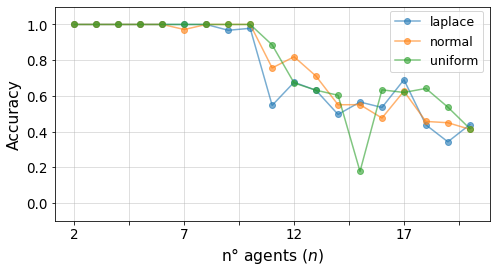

In [14]:
font=13.5

fig, ax = plt.subplots(figsize=(7,3.9))

for i, g in data.groupby('Distribution'):
    g.plot(x='n', y='Quality', ax=ax, label=str(i), style='o-', alpha=.6)#, marker='8', markersize=8, alpha=.6)#, yerr='std_acc')
#     plt.fill_between(x=g['n_agents'], y1 = g['time'] - g['std'], y2 = g['time'] + g['std'], alpha=0.2)

plt.grid(alpha=0.5)
# plt.ylabel(r'Absolute difference between energies of QA and actual solutions',fontdict={'fontsize':font+2})
plt.ylabel(r'Accuracy',fontdict={'fontsize':font+2})
plt.yticks(fontsize=font)
plt.xticks(fontsize=font)

plt.xlabel(r'n° agents $(n)$',fontdict={'fontsize':font+2})

plt.ylim(-.1, 1.1)

#n = np.arange(2,16)
#plt.plot(n, 2**n+60,  linestyle = 'dashdot', color='lightgreen', label=r'$2^n+60$')
#plt.scatter(n, 2**n+60,  color='lightgreen', label=None)


plt.legend(fontsize=font-1, bbox_to_anchor=(1.,1.01), ncol=1)
plt.tight_layout()

file = os.path.join(current_folder, 'QA_Acc.png')
plt.savefig(file, dpi=300, bbox_inches = "tight")

### QA runtime up to 65 agents

In [15]:
report_filename = "IDP_report_0001_123.txt"

IDP_brute_force = bool(int(report_filename.split('_')[-2][0]))
IDP_topdown_min_cut = bool(int(report_filename.split('_')[-2][1]))
IDP_topdown_qubo = bool(int(report_filename.split('_')[-2][2]))
IDP_min_cut_dwave_annealer = bool(int(report_filename.split('_')[-2][3]))

report_file_obj = open(os.path.join(report_filename),'r')
table_contents = [line.replace('\n','').split('__') for line in report_file_obj.readlines()]

In [16]:
current_folder = file = os.path.join(folder, 'QA_runtime')
create_dir(current_folder)

In [17]:
pd.set_option('display.max_rows', None)
df.head()

Distribution No. of Agents         Brute Force                      \
                                          Result               Value   
0      laplace             2             ['1,2']                 2.5   
1      laplace             3        ['3', '1,2']                 2.5   
2      laplace             4   ['2,4', '3', '1']                2.89   
3      laplace             5    ['1,2,5', '3,4']  21.639999999999997   
4      laplace             6  ['1,3,6', '2,4,5']  21.099999999999998   

                         Top-down approach using min-cut                      \
                     TTE                          Result               Value   
0  0.0009906291961669922                         ['1,2']                 2.5   
1                    0.0                    ['3', '1,2']                 2.5   
2                    0.0               ['2,4', '3', '1']                2.89   
3  0.0009961128234863281                ['1,2,5', '3,4']  21.639999999999997   
4   0.001994609832763672              ['1,3,6', '2,4,5']  21.099999999999998   

                                      Dwave Annealer                      \
                     TTE Quality              Result               Value   
0                    0.0     1.0             ['1,2']                 2.5   
1  0.0010154247283935547     1.0        ['3', '1,2']                 2.5   
2  0.0009951591491699219     1.0   ['1', '3', '2,4']                2.89   
3                    0.0     1.0    ['1,2,5', '3,4']  21.639999999999997   
4  0.0009975433349609375     1.0  ['1,3,6', '2,4,5']  21.099999999999998   

                               
                  TTE Quality  
0                 0.0     1.0  
1   5.409874200820923     1.0  
2   9.935318231582642     1.0  
3   10.16195011138916     1.0  
4  14.997750997543335     1.0

In [18]:
#view output table
def highlight_false(s, column):
    is_false = pd.Series(data=False, index=s.index)
    is_false[column] = round(s.loc[column],2)<1.0
    return ['color: #ff8888' if is_false.any() else '' for v in is_false]

base_cols = ['Distribution', 'No. of Agents']
sub_cols = ['', '']

if IDP_brute_force:
    base_cols = base_cols+['Brute Force']*3
    sub_cols=sub_cols+['Result', 'Value', 'TTE']
if IDP_topdown_min_cut:
    base_cols = base_cols+['Top-down approach using min-cut']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']
if IDP_min_cut_dwave_annealer:
    base_cols = base_cols+['Dwave Annealer']*4
    sub_cols=sub_cols+['Result', 'Value', 'TTE', 'Quality']


column_arrays = [base_cols, sub_cols]


#df = pd.DataFrame(table_contents, columns=table_headers)
df = pd.DataFrame(table_contents, columns=pd.MultiIndex.from_arrays(column_arrays))
df.head()

Distribution No. of Agents      Dwave Annealer                      \
                                          Result               Value   
0      laplace             2             ['1,2']                 2.5   
1      laplace             3        ['1,2', '3']                 2.5   
2      laplace             4   ['3', '2,4', '1']                2.89   
3      laplace             5    ['1,2,5', '3,4']  21.639999999999997   
4      laplace             6  ['1,3,6', '2,4,5']  21.099999999999998   

                               
                  TTE Quality  
0                 0.0    None  
1    5.31968355178833    None  
2  10.542797565460205    None  
3   9.957801342010498    None  
4   14.88630723953247    None

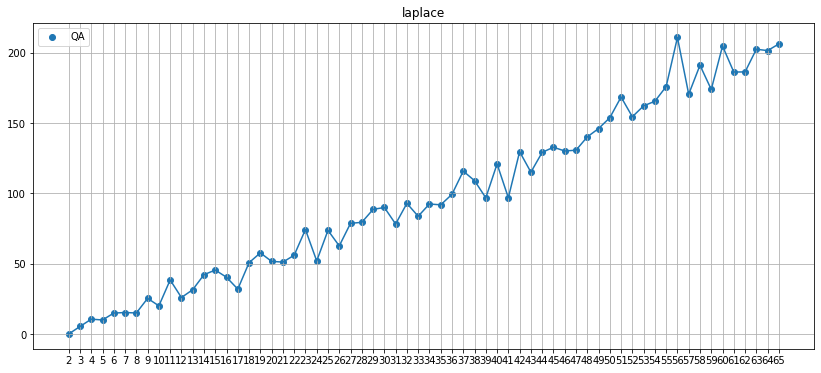

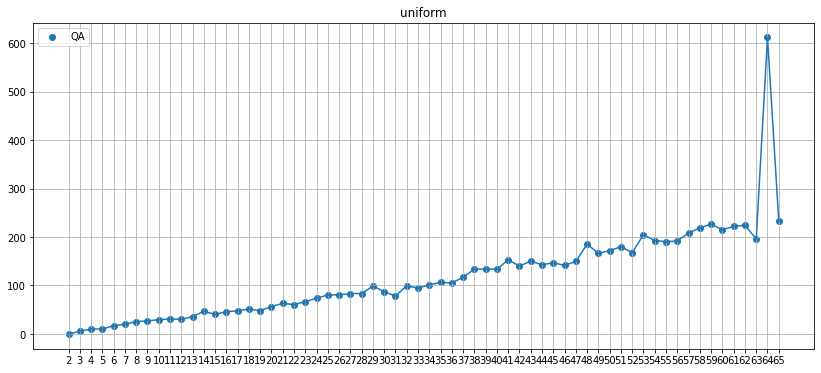

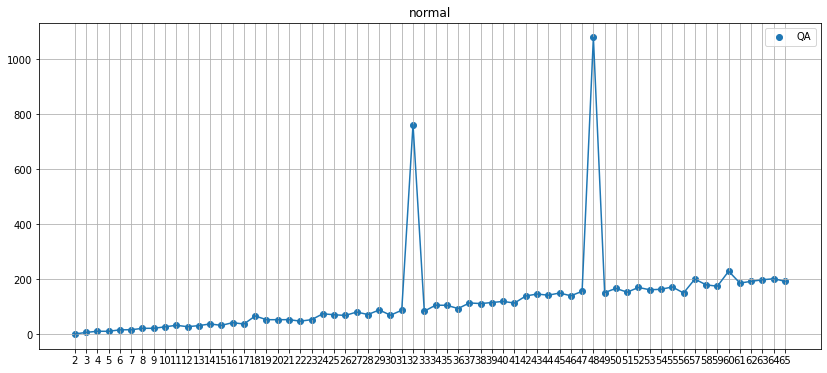

In [19]:
import matplotlib.pyplot as plt
for distr in df.Distribution.unique():
    data = df[df.Distribution == distr]
    
    
    plt.figure(figsize=(14,6))
    x = data['No. of Agents'].to_numpy()
    y_QA = data[('Dwave Annealer', 'TTE')].astype(float).to_numpy()
    
    plt.scatter(x, y_QA, label='QA')
    plt.plot(x, y_QA)
    
    plt.grid()
    plt.title(distr)
    plt.legend()
    file = os.path.join(current_folder, distr + '.png')
    plt.savefig(file, dpi=300, bbox_inches = "tight")
    plt.show()
